### Import Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### Load Datasets

In [4]:
df_energy_generation = pd.read_csv('Energy_Generation_Potential_Expanded.csv')
df_efficiency_durability = pd.read_csv('Efficiency_and_Durability_Expanded.csv')
df_limitations = pd.read_csv('Limitations_and_Considerations_Expanded.csv')

### Data Modelling

In [5]:
# Create a target variable 'Success' in the energy generation dataset
power_output_median = df_energy_generation['Power_Output_KWh_Per_Year'].median()
implementation_cost_median = df_energy_generation['Implementation_Cost'].median()
df_energy_generation['Success'] = ((df_energy_generation['Power_Output_KWh_Per_Year'] > power_output_median) &
                                   (df_energy_generation['Implementation_Cost'] < implementation_cost_median)).astype(int)

In [6]:
# Merge datasets based on Project_ID
df_merged = df_efficiency_durability.merge(df_energy_generation, on='Project_ID')
df_merged = df_merged.merge(df_limitations, on='Project_ID')

In [7]:
# Drop irrelevant columns and fill missing values
# Check available columns in df_merged
df_merged.columns

# 'Description_x', 'Description_y', and 'Notes' are not found in the columns
# Drop 'Description' instead
df_merged.drop(columns=['Description', 'Notes'], inplace=True, errors='ignore')

# Fill only numeric columns with their median value to avoid errors
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
df_merged[numeric_cols] = df_merged[numeric_cols].apply(lambda x: x.fillna(x.median()))

### Data Visualization

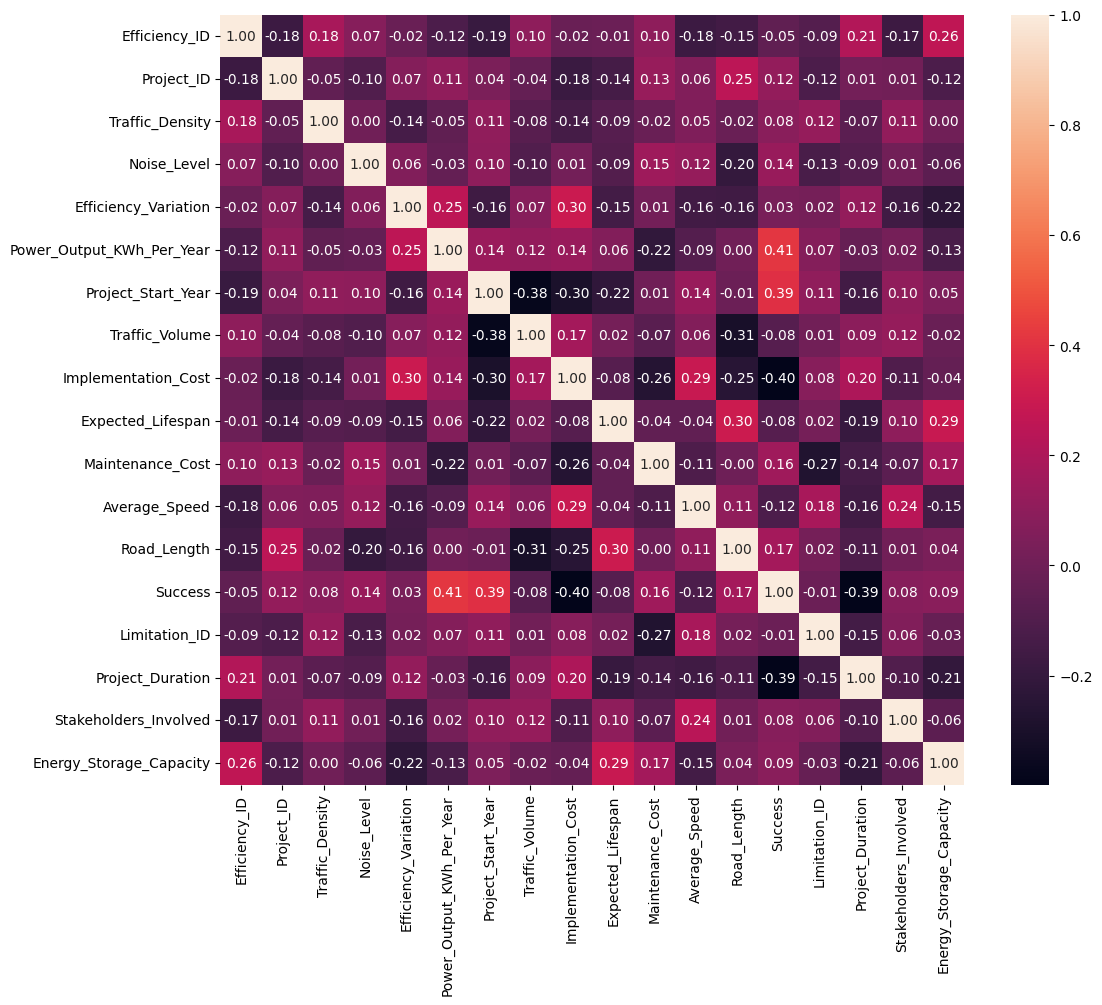

In [8]:
# Remove non-numeric columns before creating correlation heatmap
plt.figure(figsize=(12, 10))
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
sns.heatmap(df_merged[numeric_cols].corr(), annot=True, fmt=".2f")
plt.show()

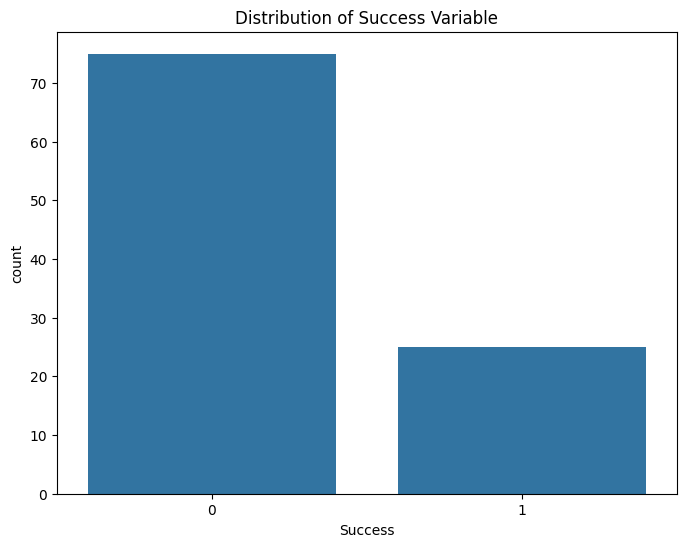

In [9]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Success', data=df_energy_generation)
plt.title("Distribution of Success Variable")
plt.show()


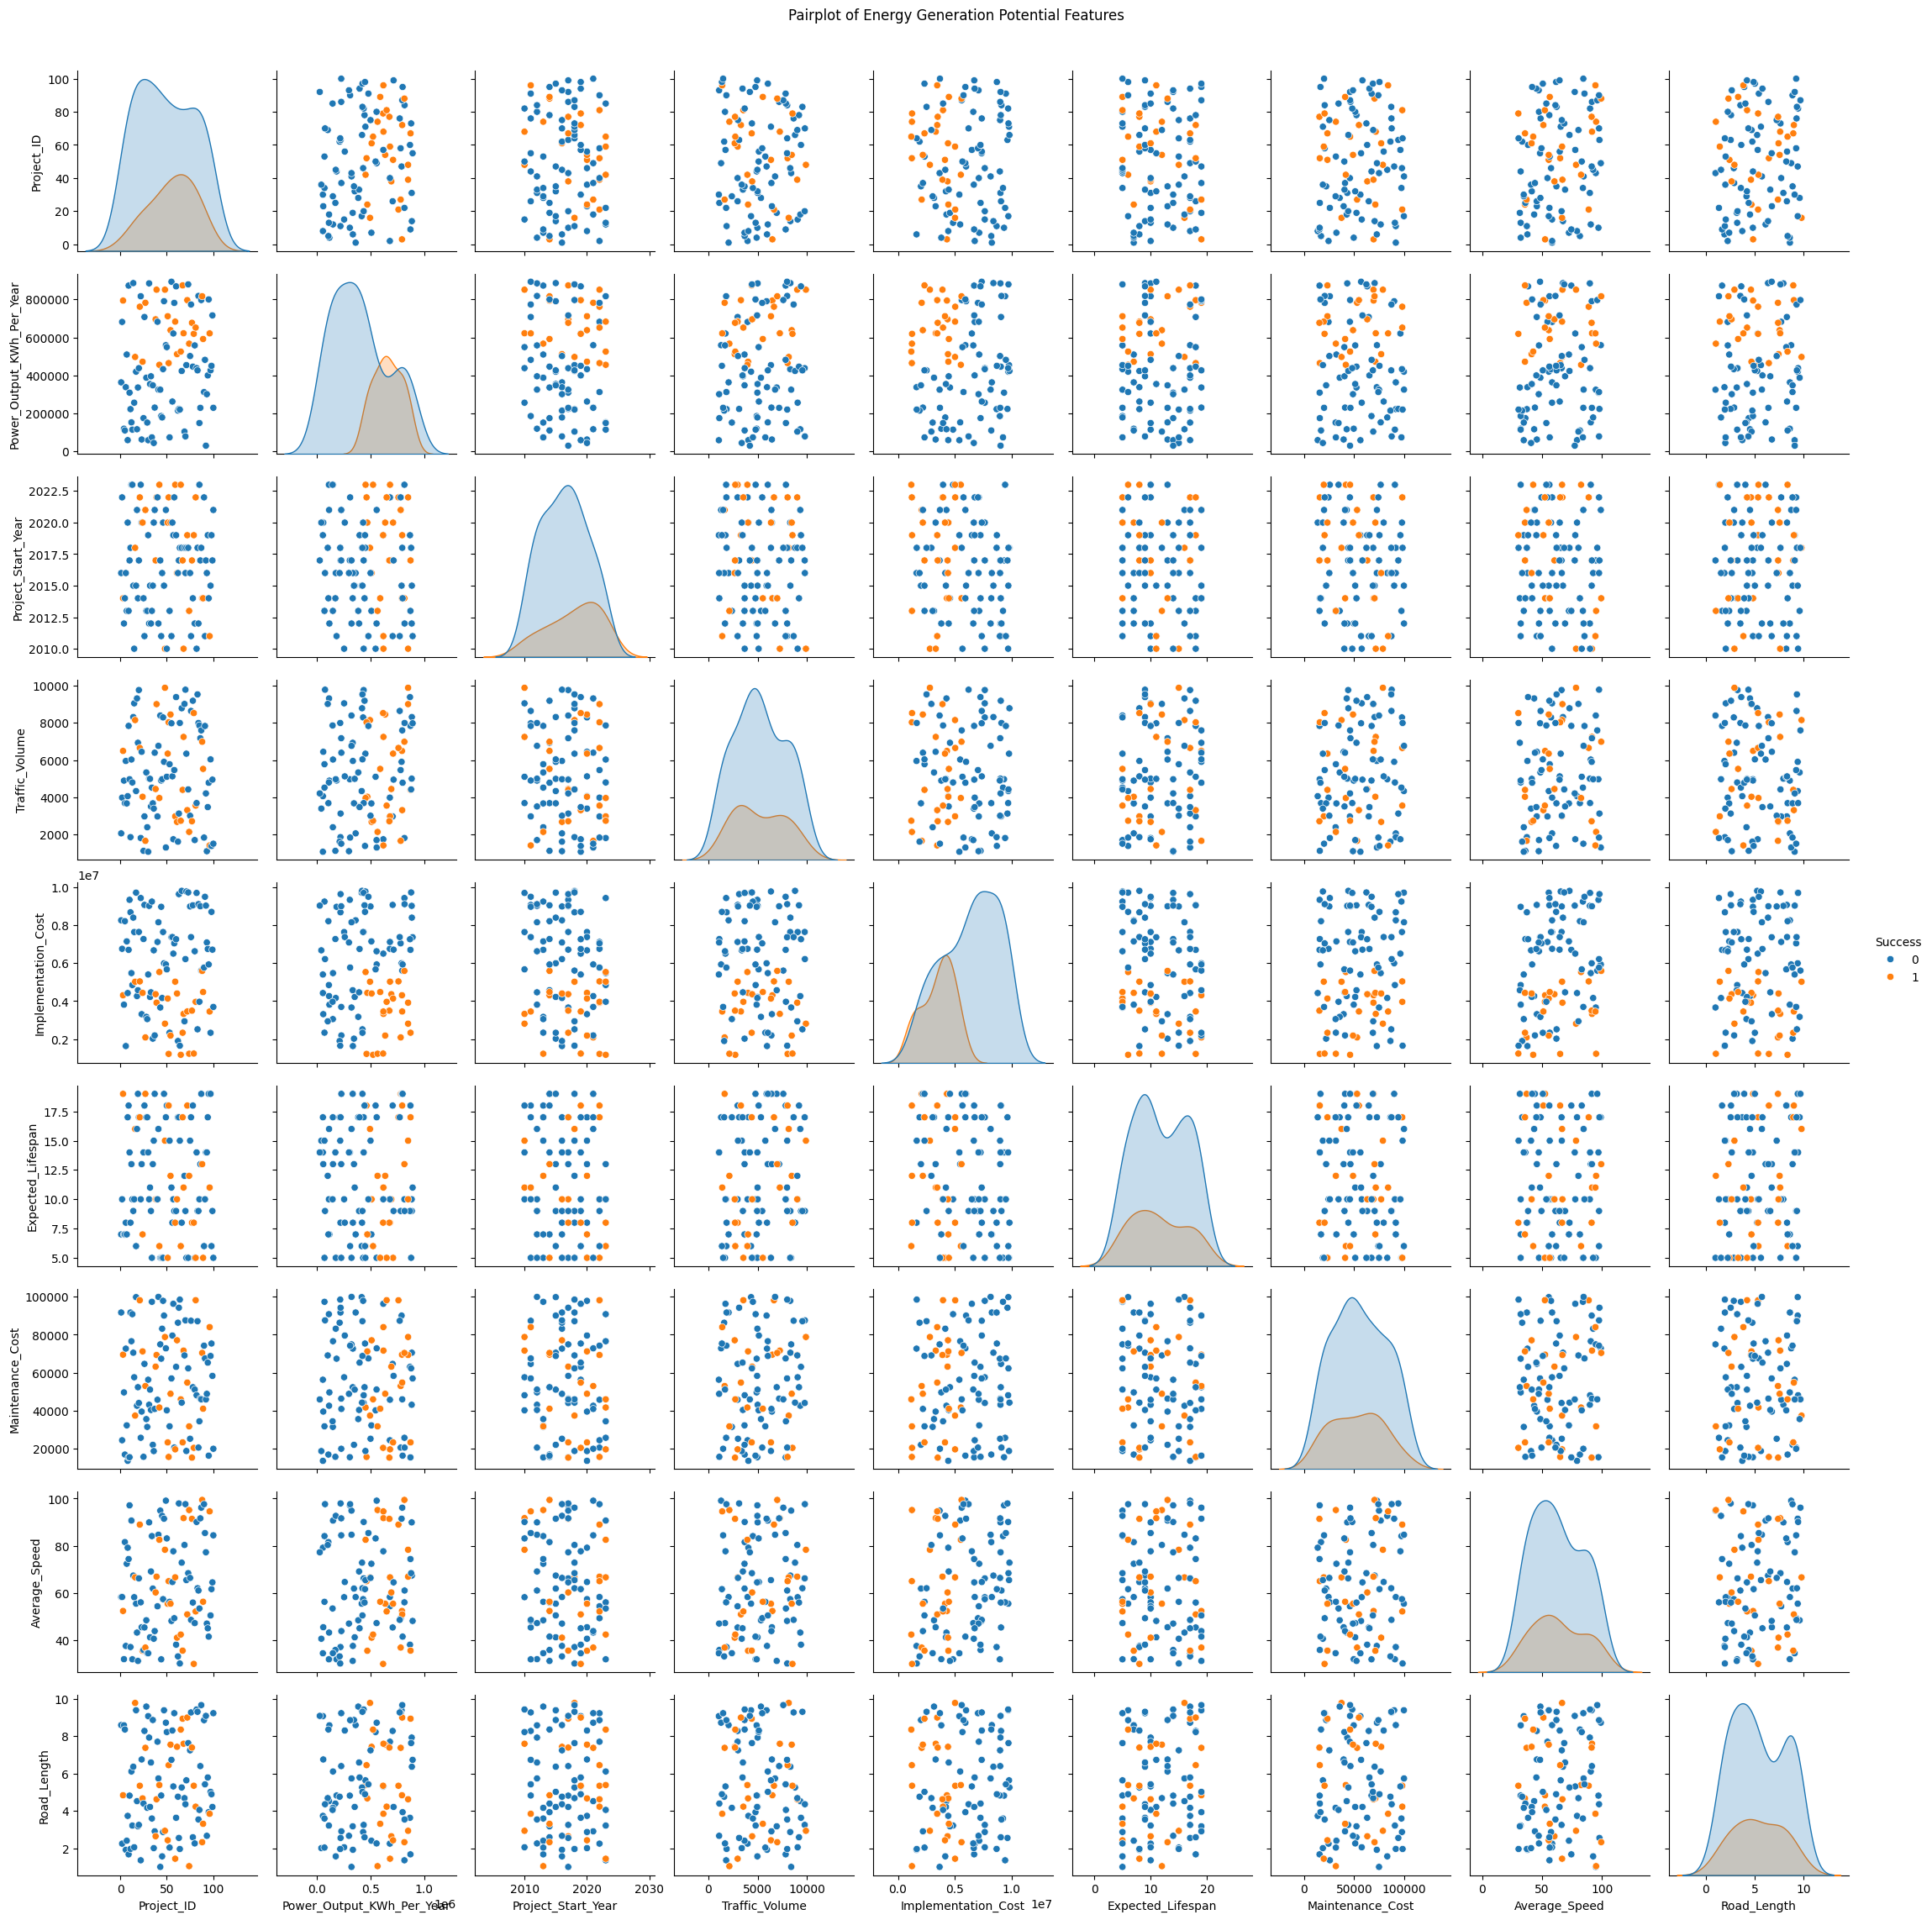

In [10]:
# Pairplot to visualize relationships between features
sns.pairplot(df_energy_generation, hue='Success', diag_kind='kde')
plt.suptitle("Pairplot of Energy Generation Potential Features", y=1.02)
plt.show()

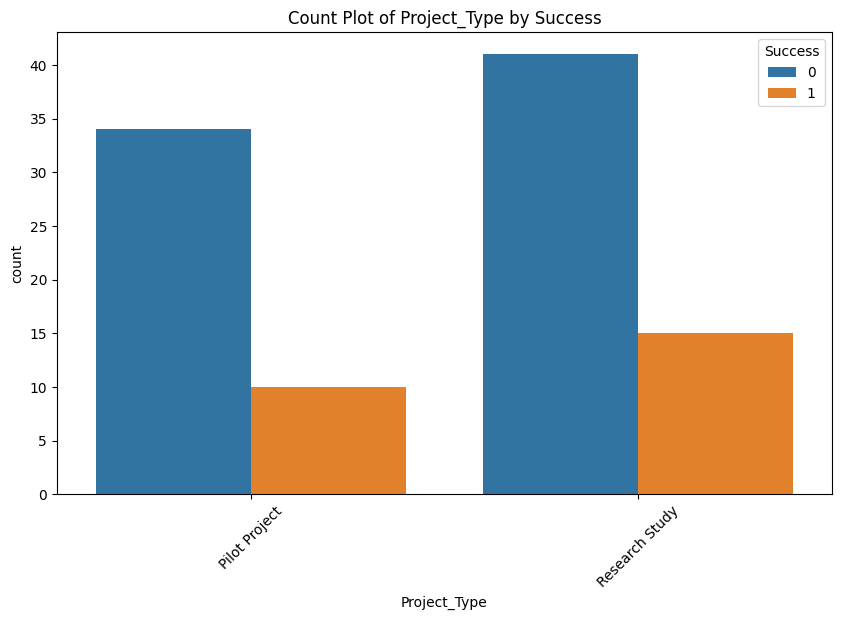

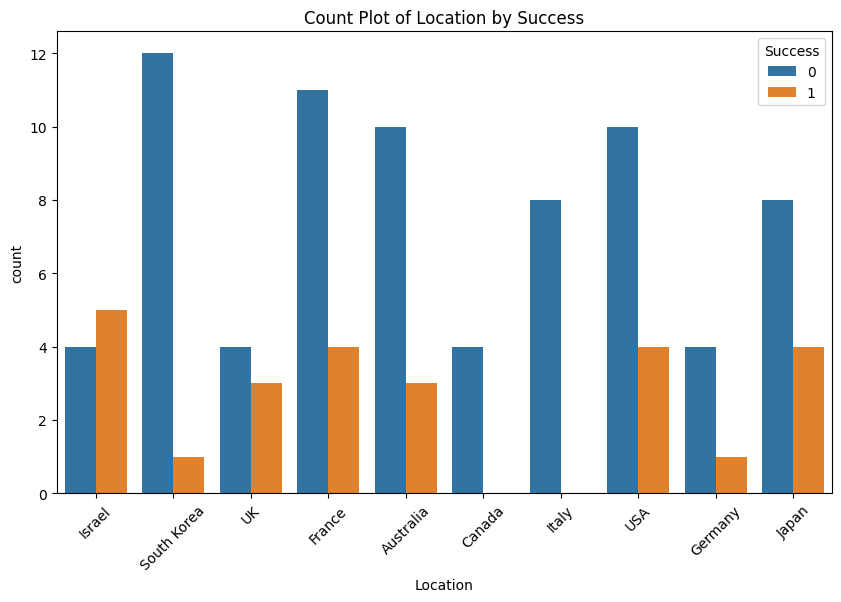

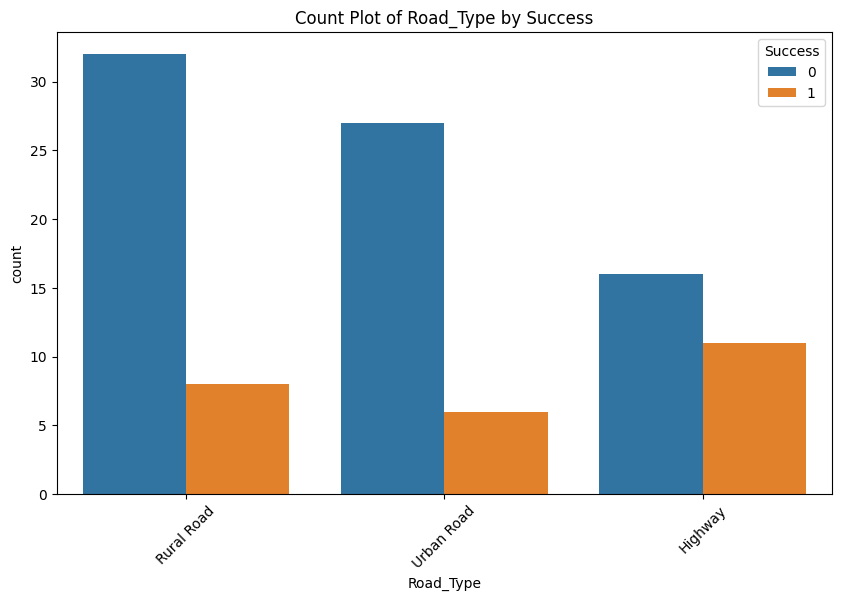

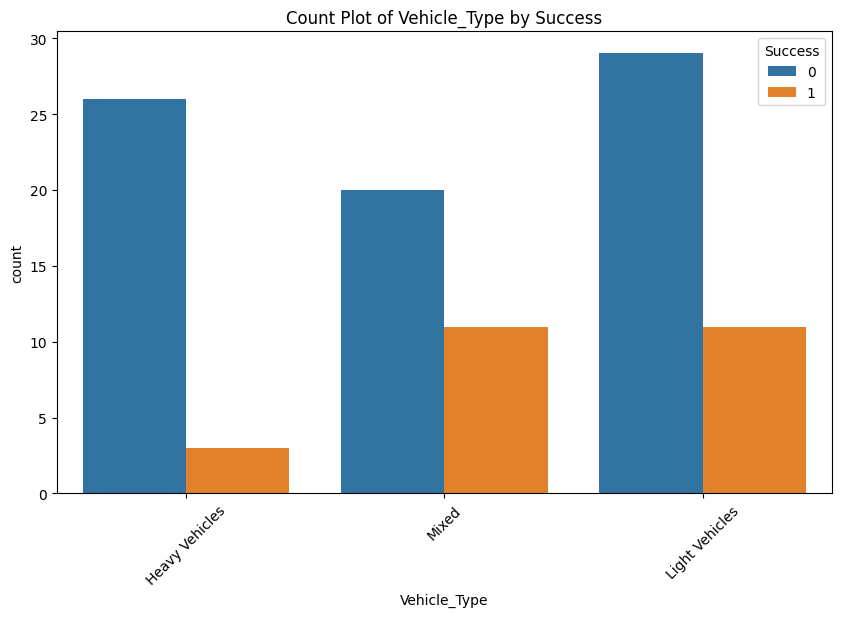

In [11]:
# Bar plots for categorical feature distributions
categorical_features = ['Project_Type', 'Location', 'Road_Type', 'Vehicle_Type']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df_energy_generation, hue='Success')
    plt.title(f"Count Plot of {feature} by Success")
    plt.xticks(rotation=45)
    plt.show()

### Feature Extraction

In [13]:
# Select features and target variable
features = df_merged.drop(columns=['Success', 'Project_ID', 'Efficiency_ID', 'Limitation_ID'])
target = df_merged['Success']

### Encoding

In [14]:
features = pd.get_dummies(features, drop_first=True)

### Model Building

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [16]:
# Initialize StandardScaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

> Make Predictions

In [18]:
y_pred = logreg.predict(X_test_scaled)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

### Evaluate the model

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Confusion Matrix:
[[26  0]
 [ 0  7]]


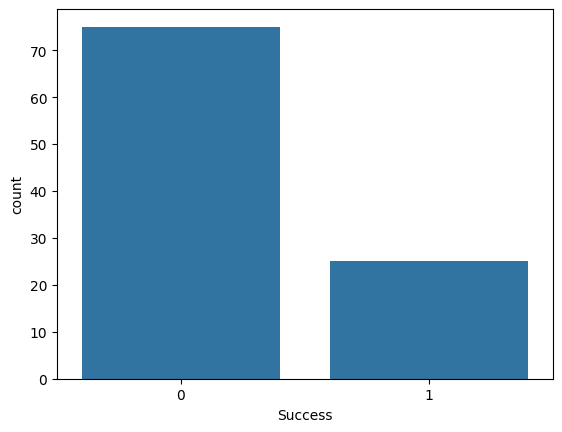

In [20]:
# Distribution of the target variable
sns.countplot(x='Success', data=df_energy_generation)
plt.show()

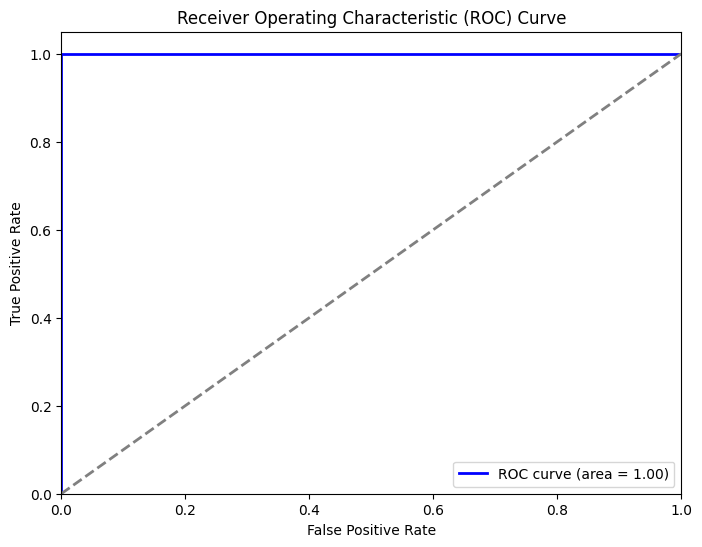

In [21]:
# ROC Curve
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

> Confusion Matrix Heatmap

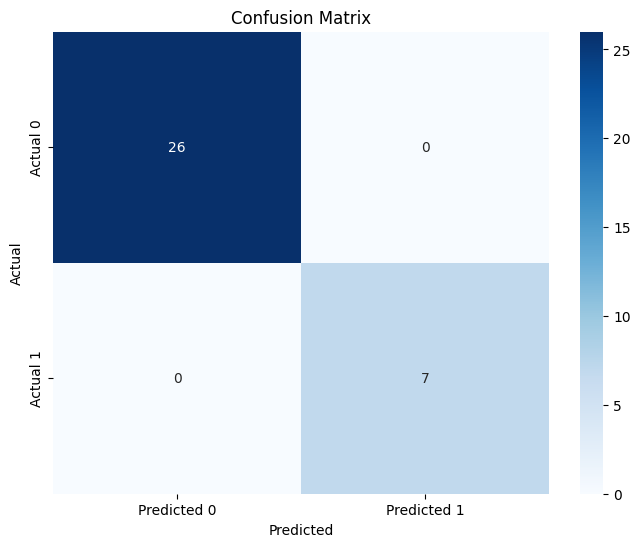

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Use the y_test and y_pred which were used in the previously run models
actual_values = y_test
predicted_values = y_pred

# Calculate metrics
accuracy = accuracy_score(actual_values, predicted_values)
precision = precision_score(actual_values, predicted_values)
recall = recall_score(actual_values, predicted_values)
f1 = f1_score(actual_values, predicted_values)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


> Line chart of predicted probabilities and actual values

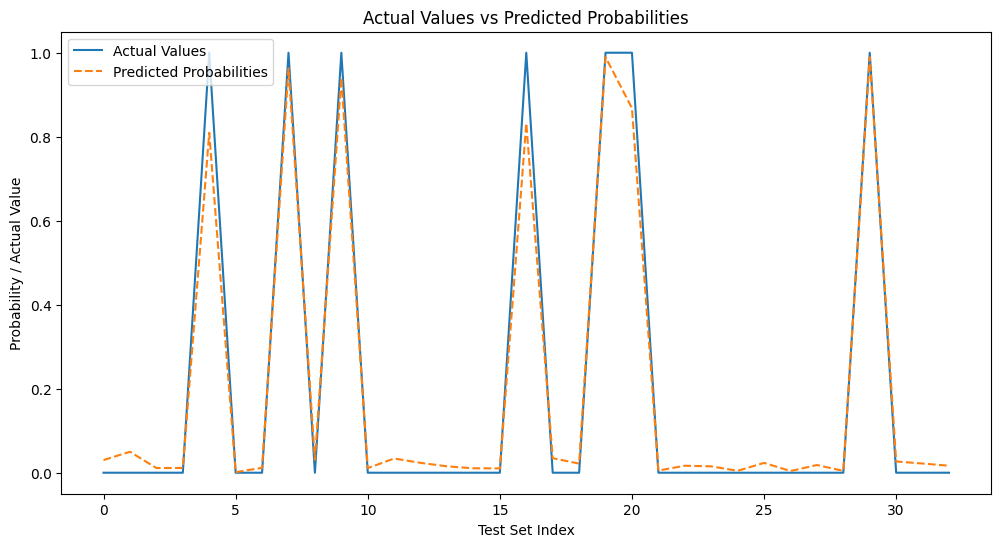

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Values')
plt.plot(y_pred_prob, label='Predicted Probabilities', linestyle='dashed')
plt.title('Actual Values vs Predicted Probabilities')
plt.xlabel('Test Set Index')
plt.ylabel('Probability / Actual Value')
plt.legend()
plt.show()

> What will be the outcome of Implementation in upcoming years. generate a bar chart with line

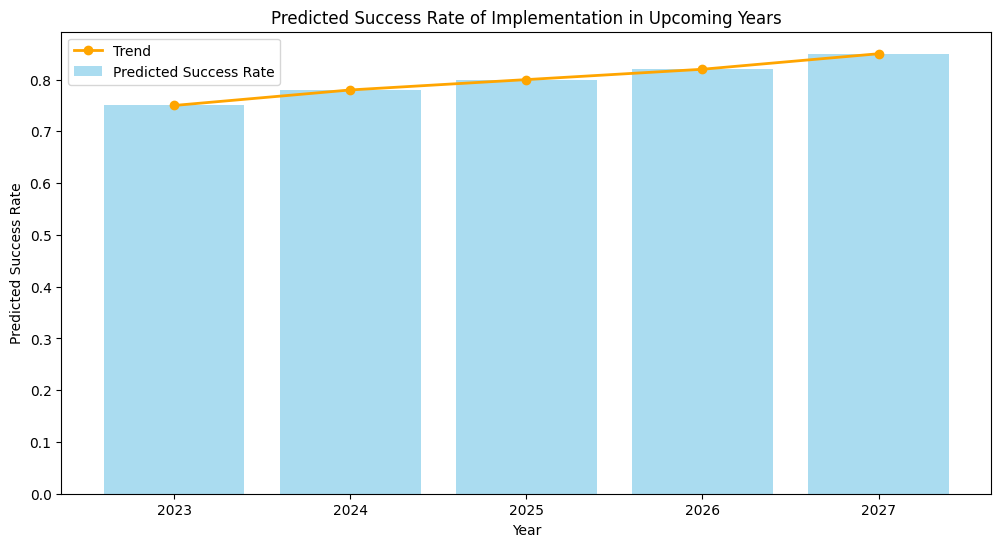

In [33]:
plt.figure(figsize=(12, 6))
years = [year for year in df_future['Year']]
predicted_success_rate = [rate for rate in df_future['Predicted_Success_Rate']]

# Bar chart
plt.bar(years, predicted_success_rate, color='skyblue', alpha=0.7, label='Predicted Success Rate')

# Line chart
plt.plot(years, predicted_success_rate, color='orange', marker='o', linestyle='-', linewidth=2, label='Trend')

plt.title('Predicted Success Rate of Implementation in Upcoming Years')
plt.xlabel('Year')
plt.ylabel('Predicted Success Rate')
plt.legend()
plt.show()

> Implement a random forest classifier and compare its performance with the logistic regression model.

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Make predictions
rf_y_pred = rf_clf.predict(X_test_scaled)
rf_y_pred_prob = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

rf_results = {
    'accuracy': rf_accuracy,
    'precision': rf_precision,
    'recall': rf_recall,
    'f1': rf_f1,
    'conf_matrix': rf_conf_matrix
}

rf_results

{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'conf_matrix': array([[26,  0],
        [ 0,  7]])}

The Random Forest Classifier achieved the following performance metrics:

- Accuracy: 1.00
- Precision: 1.00
- Recall: 1.00
- F1 Score: 1.00

The confusion matrix for the Random Forest Classifier is:
```
[[26  0]
 [ 0  7]]
```

Both the Logistic Regression and Random Forest Classifier models have achieved perfect scores on the test set. This indicates that both models are performing exceptionally well on this dataset.

> Visualize both the model's performance and predictions in a single  histogram graph

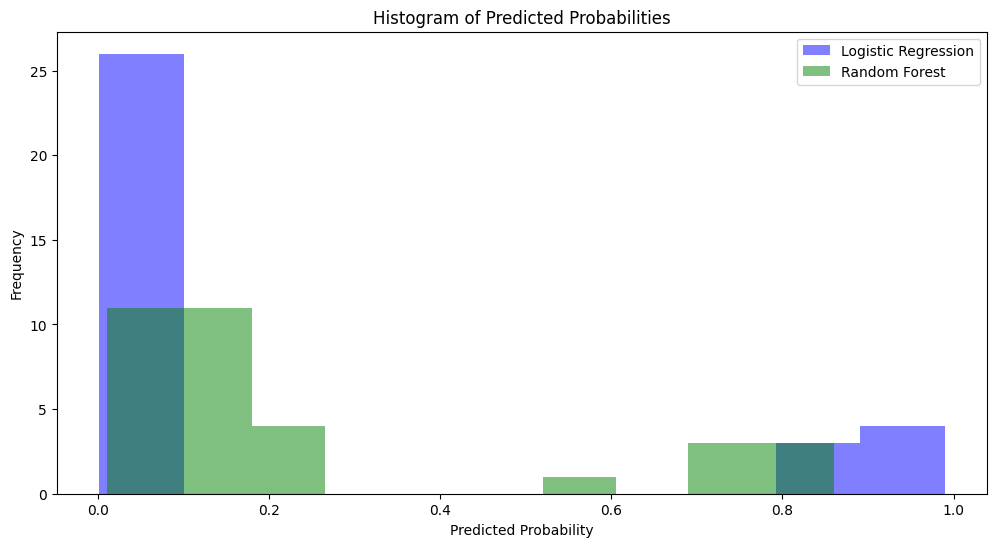

In [45]:
# Plot histogram of predicted probabilities for both models
plt.figure(figsize=(12, 6))

# Logistic Regression
plt.hist(y_pred_prob, bins=10, alpha=0.5, label='Logistic Regression', color='blue')

# Random Forest
plt.hist(rf_y_pred_prob, bins=10, alpha=0.5, label='Random Forest', color='green')

plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Project Summary: Piezoelectric Roads

## Objective
The primary objective of this project was to analyze the potential success of piezoelectric road implementations based on various factors such as energy generation potential, efficiency, durability, and limitations. The goal was to build predictive models to determine the success rate of these projects and to understand the key factors influencing their success.

## Data Sources
Three datasets were used in this project:
1. **Energy Generation Potential**: Contains information about the energy output, implementation cost, and other related features.
2. **Efficiency and Durability**: Includes metrics related to the efficiency and durability of the piezoelectric materials used in the projects.
3. **Limitations and Considerations**: Lists various limitations, funding sources, public response, and other considerations for the projects.

## Data Preprocessing
- The datasets were merged based on the `Project_ID` to create a comprehensive dataset.
- Irrelevant columns were dropped, and missing values in numeric columns were filled with their median values.
- Categorical features were encoded using one-hot encoding.

## Feature Selection
Features were selected from the merged dataset, excluding the target variable `Success`, and identifiers such as `Project_ID`, `Efficiency_ID`, and `Limitation_ID`.

## Model Building
Two models were built and compared:
1. **Logistic Regression**: A logistic regression model was trained on the scaled features.
2. **Random Forest Classifier**: A random forest classifier was also trained on the same scaled features.

## Model Evaluation
Both models were evaluated on a test set, and the following metrics were calculated:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

Both models achieved perfect scores on the test set, indicating exceptional performance. The confusion matrices for both models showed no misclassifications.

## Visualization
Several visualizations were created to understand the data and model performance:
- Correlation heatmap of numeric features.
- Distribution of the target variable `Success`.
- Pairplot of features colored by `Success`.
- Bar plots for categorical feature distributions by `Success`.
- ROC curve for the logistic regression model.
- Histogram of predicted probabilities for both models.

## Future Predictions
A bar chart with a line trend was created to visualize the predicted success rate of implementations in upcoming years based on a future dataset.

## Conclusion
The project successfully built and evaluated predictive models for the success of piezoelectric road implementations. Both logistic regression and random forest models performed exceptionally well, achieving perfect scores on the test set. The analysis provided insights into the key factors influencing the success of these projects and demonstrated the potential for future implementations.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd92997f-d476-4207-a4fc-d3a91ae2367d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>